## Data 확보

### Image Scrapping

In [1]:
import pandas as pd
import sqlite3

from selenium import webdriver
from bs4 import BeautifulSoup
import requests

import time

### Image URL 주소 scrapping

In [2]:
url = "https://store.musinsa.com/app/goods/685185"
# headers = {'User-Agent' : 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.101 Safari/537.36'}

In [3]:
driver = webdriver.Chrome(executable_path='(driver) chromedriver.exe')
driver.get(url)

In [6]:
img_url_lst = []

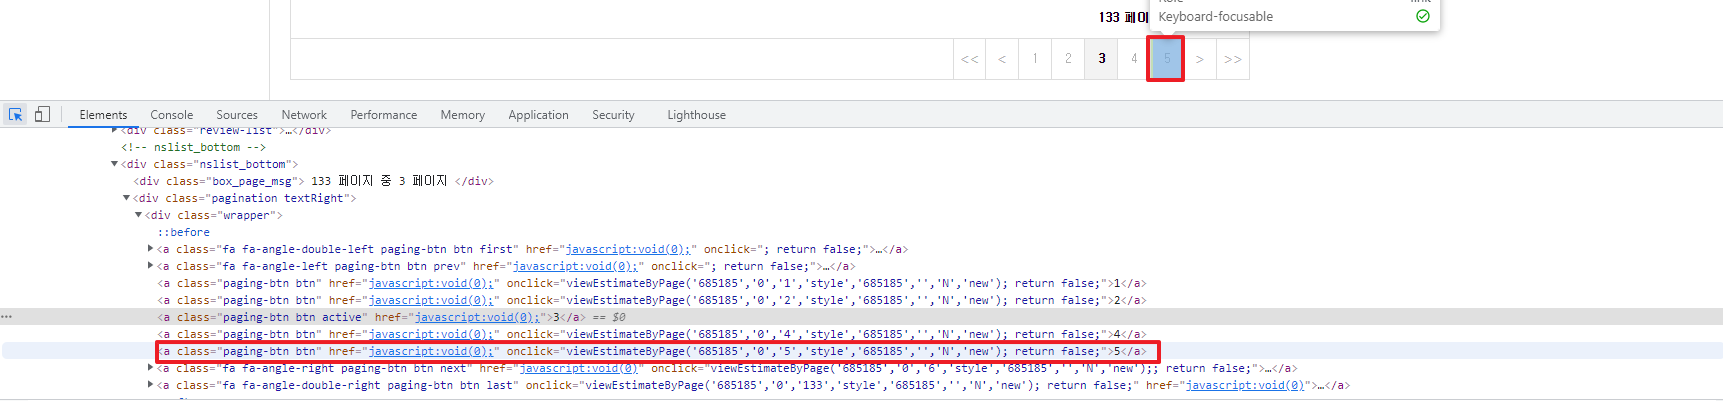

In [7]:
# 한 page당 10개의 review
# 1~100page 이동
# total 1000개의 Data확보

for i in range(1,101):
    # Page이동 - java script code실행
    driver.execute_script("viewEstimateByPage('685185','0',{},'style','685185','','N','new'); return false;".format(i))
    time.sleep(2) # selenium 특성상, loading속도를 못따라갈 수 있으므로 2초씩 sleep진행
    web = driver.page_source # selenium으로 열어둔 driver의 현재 page로 접근
    
    soup = BeautifulSoup(web, 'html.parser')
    scrapping_url_dir = soup.find_all('li', {"class":"review-content-photo__item"})

    for img_url in scrapping_url_dir:
        temp_ = img_url.find('img')['src']
        # https:가 생략된 url이 나오므로, 이를 추가하여 list-up
        img_url_lst.append("https:"+temp_)

        
# url이 바뀌지 않아서 선택한 방법
# # page이동 방법1 - java code 실행시키기
# driver.execute_script("viewEstimateByPage('685185','0','2','style','685185','','N','new'); return false;")
        
# # page이동 방법2 - css 코드에서 찾기
# driver.find_elements_by_css_selector('#wrapStyleEstimateList > div > div.nslist_bottom > div.pagination.textRight > div > a')[4].click()

In [9]:
driver.close()
driver.quit()

#### image 다운받기

In [29]:
import urllib.request
import glob

import pandas as pd
import os

In [21]:
df_img_url=pd.DataFrame(img_url_lst,columns=['url'])
df_img_url.to_csv('685185.csv',encoding='utf-8')

In [24]:
img_url_lst = df_img_url['url'].to_list()

In [33]:
# images folder 생성
os.mkdir(os.getcwd()+"\\images")

In [ ]:
for index, url in enumerate(img_url_lst): # 주어진 그룹형 변수로부터 index 값까지 한번에 얻어냅니다.

    urllib.request.urlretrieve(url, "images/images{0:04}.jpg".format(index)) # 특정 'url'로부터 데이터를 찾아(retrieve) 지정한 파일명으로 저장
    # retrieve : 인출. 
    if index%100 == 0:
        print('Downloaded image # :', index)
    time.sleep(0.4)
    
print('Download completed!')

Downloaded image # : 0
Downloaded image # : 100
Downloaded image # : 200
Downloaded image # : 300
Downloaded image # : 400
Downloaded image # : 500
Downloaded image # : 600
Downloaded image # : 700
Downloaded image # : 800
Downloaded image # : 900
Downloaded image # : 1000
Downloaded image # : 1100
Downloaded image # : 1200
Downloaded image # : 1300
Downloaded image # : 1400
Downloaded image # : 1500
